In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [73]:
etica={'atacar_individus_diferents':0,
       'atacar_individus_diferents_si_tenen_menjar':0,
       'compartir_aliment_amb_la_meva_especie_si_sobra':1,
       'morem_cap_a_altres_individus':1,
       'acapara_menjar':1,
      }

THR_DISTANCIA_MENJAR=3
THR_MAXIM_DIES_SENSE_MENJAR=15
class Individu:
    def __init__(self,world_size_x,world_size_y,raza):
        self.world_size_x=world_size_x
        self.world_size_y=world_size_y
        self.x=np.random.randint(self.world_size_x)
        self.y=np.random.randint(self.world_size_y)
        self.raza=raza
        # Estat del individu
        self.dies_sense_menjar=0
        self.esta_viu=True
        self.menjar_guardat=0
        
    def random_walk(self):
        
        self.y=self.y+(np.random.randint(3)-1)
        self.y=min(max(self.y,0),self.world_size_y-1)
        
        self.x=self.x+(np.random.randint(3)-1)
        self.x=min(max(self.x,0),self.world_size_x-1)
    
    def agafar_mengar(self,llista_aliments):
        if self.esta_viu:
            sobra=[]
            for p in llista_aliments:
                if (abs(p[1]-self.x)+abs(p[0]-self.y))<THR_DISTANCIA_MENJAR:
                    if not self.guardar_menjar():
                        sobra.append(p)
                else:
                    sobra.append(p)
            return sobra
        else:
            return llista_aliments.copy()

        
    def menjar(self):
        if self.menjar_guardat>0:
            self.dies_sense_menjar=0
            self.menjar_guardat-=1
            
        
    def guardar_menjar(self):
        if (self.menjar_guardat<1) or (etica['acapara_menjar']):
            self.menjar_guardat+=1
            return True
        return False
                
            
        
    def recalcular_estat_dia(self):
        self.dies_sense_menjar+=1
        if self.dies_sense_menjar>THR_MAXIM_DIES_SENSE_MENJAR:
            self.esta_viu=False
        
    def plot(self):
        if self.esta_viu:
            plt.plot(self.y,self.x,'o'+self.raza)
            
    def __repr__(self):
        txt=f'({self.y},{self.x})'
        return txt
    
        
    
        

In [78]:
w_x=100
w_y=100

poblacio=[Individu(w_x,w_y,raza='b') for _ in range(10)]+[Individu(w_x,w_y,raza='g') for _ in range(10)]
aliment_disponible=[[np.random.randint(w_y),np.random.randint(w_x)] for _ in range(1230)]


In [79]:

def plot_reixeta(sx,sy):
    for x in range(sx):
        for y in range(sy):
            plt.plot([0,sx],[y,y],'-k')
            plt.plot([x,x],[0,sy],'-k')
    

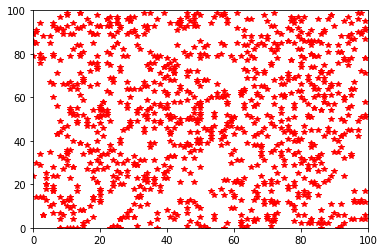

In [80]:
from IPython.display import clear_output

for iteracio in range(100):
    clear_output(wait=True)
    plt.figure()
    plt.plot([x[0] for x in aliment_disponible],[x[1] for x in aliment_disponible],'*r')
    for p in poblacio:
        p.plot()
        p.random_walk()
        aliment_disponible=p.agafar_mengar(aliment_disponible)
        p.menjar()
        p.recalcular_estat_dia()
        

    plt.axis([0,100,0,100])
    plt.show()
    


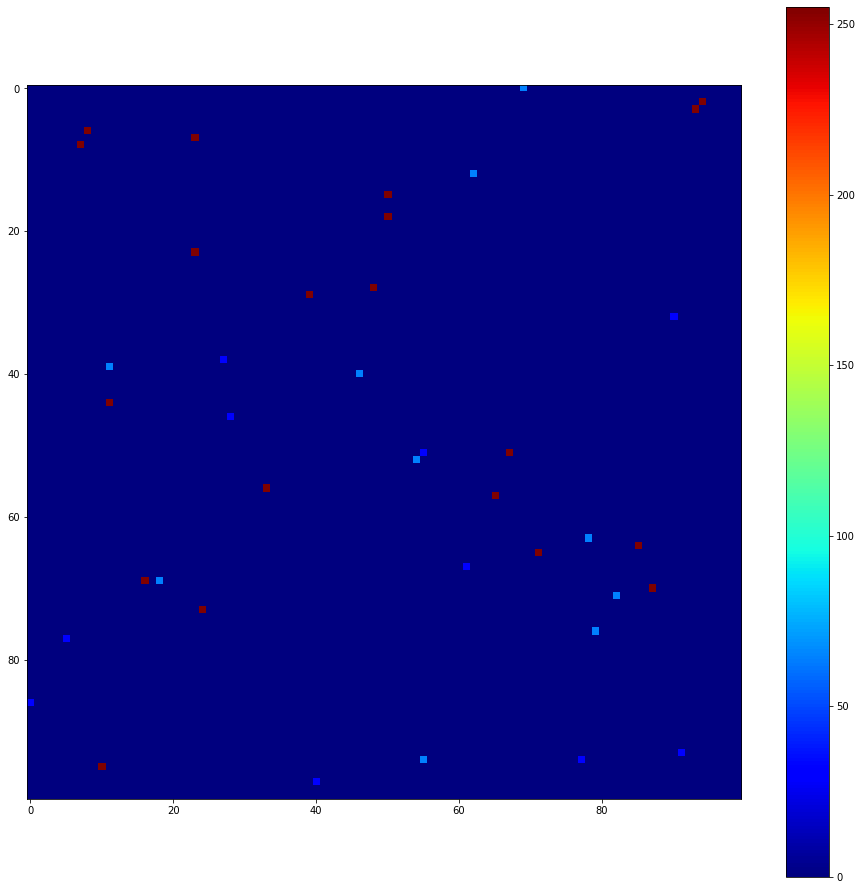

In [35]:
world=np.zeros((100,100))
for i in range(10):
    world[np.random.randint(w_x),np.random.randint(w_y)]=32
    world[np.random.randint(w_x),np.random.randint(w_y)]=64

for i in range(20):
    world[np.random.randint(w_x),np.random.randint(w_y)]=255
    
plt.figure(figsize=(16,16))
plt.imshow(world,cmap='jet')
plt.colorbar()

    
    

[1, 0, 1, -1, -1, 0, -1, 0, -1, 1]